In [3]:
pip install matlablib


  Using cached matlablib-1.3-py3-none-any.whl (3.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import pandas as pd
import matlablib as plt
import numpy as np

In [5]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print(s)

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [6]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Auswahl von setosa und versicolor

In [8]:
y = df.iloc[0:100, 4].values
y = np.where(y== 'Iris-setosa', -1, 1)

# Auswahl von Kelch- und Blütenblattlänge

In [9]:
X = df.iloc[0:100, [0, 2]].values

# Diagramm ausgeben

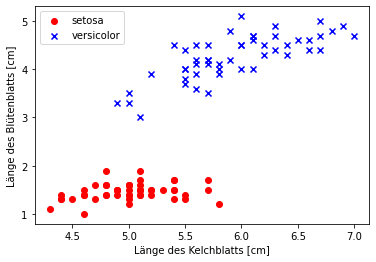

In [10]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker ='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('Länge des Kelchblatts [cm]')
plt.ylabel('Länge des Blütenblatts [cm]')
plt.legend(loc='upper left')
plt.show()

In [15]:
class Perceptron(object):
    """ Perzeptron-Klassifikator
    Parameter
    ---------
    eta : float
        Lernrate (zwischen 0.0 und 1.0)
    n_iter : int
        Durchläufe der Trainingsdatenmenge

    random_state : int
        Zufallszahlengenerator für Initialisierung
        mit zufälligen Gewichten

    Attribute
    ---------
    w_ : 1d-Array
        Gewichtung nach Anpassung
    errors_ : list
        Anzahl der Fehlklassifikationen (Updates) pro Epoche

    """
    def __init__(self, eta=0.01, n_iter= 50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Anpassen an die Trainingsdaten

        Parameter
        ---------
        X : {array-like}, shape = [n_samples, n_features]
            Trainingsvektoren, n_samples ist die Anzahl der Objekte und
            n_features ist die Anzahl der Merkmale

        y : array-like, shape = [n_samples]
            Zielwerte

        Rückgabewert
        ------------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale= 0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))

                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)

            self.errors_.append(errors)

        return self

    def net_input(self, X):
        """ Netzeingabe berechenen"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Klassenbezeinung zurückgeben"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [16]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

<function matplotlib.pyplot.show(close=None, block=None)>

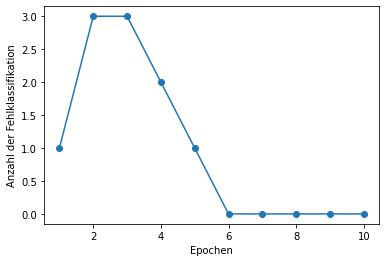

In [18]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochen')
plt.ylabel('Anzahl der Fehlklassifikation')
plt.show

In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Markierungen und Farben einstellen
    markers = ('s', 'x', 'o', '+', 'v')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plotten der Entscheidungsgrenze
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plotten aller Objekte
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


<ipython-input-33-c36703c10d86>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


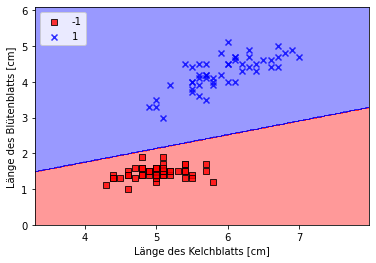

In [34]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Länge des Kelchblatts [cm]')
plt.ylabel('Länge des Blütenblatts [cm]')
plt.legend(loc='upper left')
plt.show()